In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
from utils.generators import gen_shapes, gen_noise, gen_image, gen_details
from utils.helpers import gen_grid_image

rnd=np.random.default_rng(31)


In [2]:
num_images=2

num_shapes=50
max_radius=1/20
min_radius=1/40

num_noise=500
max_line=1/10
min_line=1/80

im_size=1024
max_lw=0.5
min_lw=0.1

radius = int(max_radius*im_size)+1
detail_im_size = 2*radius+1

fluct=0

In [3]:
images = []
labels = []
details = []
boxes = []

for i in range(num_images) :
    shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
    noise = gen_noise(rnd, num_noise, max_line, min_line)
    img, sha, nse, box = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)
    focus = gen_details(detail_im_size, sha, img, rnd, fluct)
    images.append(img)
    labels.append(sha)
    details.append(focus)
    boxes.append(box)

plt.close()

np.savez_compressed('data/data.npz', images=images, labels=labels, details=details, boxes=boxes)

In [4]:
loaded  = np.load('data/data.npz')
images = loaded['images']
labels = loaded['labels']
details = loaded['details']
boxes = loaded['boxes']

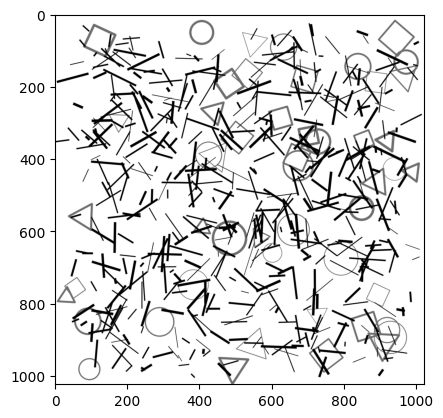

In [5]:
image=images[0]

fig = plt.figure(figsize=(image.shape[1],image.shape[0]),dpi=1)
fig.figimage(image, cmap='gray')
fig.savefig('data/tmp_image.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_image.png'))

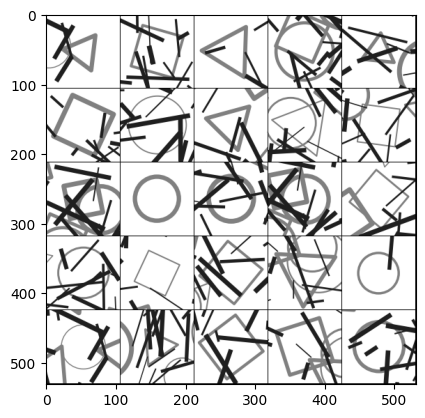

In [6]:
image=images[0]
detail=details[0]

grid = (5,5)
grid_image, grid_pos = gen_grid_image(detail, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_grid.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_grid.png'))

In [7]:
label=labels[0]

print("\nposition : shape : [pos_x, pos_y, size, rotation, line_width]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {int(label[i][0])} {label[i][1:]}")


position : shape : [pos_x, pos_y, size, rotation, line_width]
(0, 0) : 3 [989.37  587.015  29.232   1.451   0.431]
(0, 1) : 4 [690.675 844.224  43.005   0.508   0.277]
(0, 2) : 3 [ 80.043 463.09   41.682   1.538   0.402]
(0, 3) : 2 [673.202 604.254  41.08    0.      0.326]
(0, 4) : 3 [407.77  432.145  26.666   1.995   0.354]
(1, 0) : 4 [123.856 950.38   45.89    0.349   0.486]
(1, 1) : 2 [382.882 274.745  41.445   0.      0.128]
(1, 2) : 3 [440.622 752.709  37.259   1.315   0.406]
(1, 3) : 3 [445.243 630.669  47.726   1.415   0.145]
(1, 4) : 4 [888.406 835.028  38.453   0.654   0.136]
(2, 0) : 4 [702.47  686.238  33.723   0.98    0.476]
(2, 1) : 2 [406.183 972.943  31.562   0.      0.443]
(2, 2) : 2 [848.7   486.845  32.298   0.      0.49 ]
(2, 3) : 2 [727.888 671.013  33.732   0.      0.44 ]
(2, 4) : 4 [531.841 858.102  42.484   0.09    0.195]
(3, 0) : 2 [632.837 932.549  36.259   0.      0.204]
(3, 1) : 4 [894.291 247.128  34.648   0.348   0.139]
(3, 2) : 4 [504.495 681.996  45.339 

In [8]:
box=boxes[0]

print("\nposition : [x_min, x_max, y_min, y_max]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {box[i]}")


position : [x_min, x_max, y_min, y_max]
(0, 0) : [ 960.347 1006.905  560.135  610.404]
(0, 1) : [653.102 728.247 806.651 881.796]
(0, 2) : [ 38.383 102.071 426.32  498.476]
(0, 3) : [632.121 714.282 563.174 645.335]
(0, 4) : [383.463 429.421 416.579 458.679]
(1, 0) : [ 80.735 166.977 907.258 993.501]
(1, 1) : [341.438 424.327 233.3   316.19 ]
(1, 2) : [404.579 466.82  716.774 779.203]
(1, 3) : [398.098 475.241 586.13  667.788]
(1, 4) : [857.88  918.932 804.502 865.554]
(2, 0) : [674.454 730.485 658.223 714.253]
(2, 1) : [ 374.621  437.744  941.382 1004.505]
(2, 2) : [816.402 880.998 454.547 519.143]
(2, 3) : [694.156 761.62  637.281 704.745]
(2, 4) : [489.531 574.152 815.792 900.412]
(3, 0) : [596.578 669.096 896.29  968.808]
(3, 1) : [861.721 926.862 214.557 279.698]
(3, 2) : [459.388 549.602 636.889 727.103]
(3, 3) : [867.348 952.381  63.765 139.555]
(3, 4) : [ 66.15  124.167  12.08   70.097]
(4, 0) : [907.92  971.394 563.551 627.025]
(4, 1) : [548.615 595.338 378.851 430.316]
(4, 2